# Trabajo Práctico Análisis de Datos

In [17]:
!pip install kagglehub --quiet

import kagglehub
import os

# Fuerza a KaggleHub a volver a descargar la versión correcta
path = kagglehub.dataset_download("asaniczka/tmdb-movies-dataset-2023-930k-movies")

print("Dataset descargado en:", path)
os.listdir(path)


Using Colab cache for faster access to the 'tmdb-movies-dataset-2023-930k-movies' dataset.
Dataset descargado en: /kaggle/input/tmdb-movies-dataset-2023-930k-movies


['TMDB_movie_dataset_v11.csv']

## Librerías

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm

## Dataset: Full TMDB Movies Dataset 2024 (Version 685 - 05/09/2025)

### Descripción del dataset

Es el dataset completo generado desde TMDb (The Movie Database). TMDb es una base de datos de películas completa que proporciona información sobre mas de 1M de peliculas desde 1916 hasta la actualidad.

Posee las 24 variable mostradas a continuación

Nro | Variable            | Tipo      | Descripción                                                                      |
----|---------------------|-----------|----------------------------------------------------------------------------------|
01  | id                  | int       | Identificador único de cada película.                                            |
02  | title               | str       | Título de la película.                                                           |
03  | vote_average        | float     | Promedio de votos o calificación otorgada por los espectadores.                  |
04  | vote_count          | int       | Cantidad total de votos recibidos por la película.                               |
05  | status              | str       | El estado de la película (p. ej., Lanzada, Rumoreada, En postproducción, etc).   |
06  | release_date        | str       | Fecha en que la película fue estrenada.                                          |
07  | revenue             | int       | Recaudación total generada por la película.                                      |
08  | runtime             | int       | Duración de la película en minutos.                                              |
09  | adult               | bool      | Indica si la película es apta solo para audiencias adultas.                      |
10  | backdrop_path       | str       | URL de la imagen de fondo de la película.                                        |
11  | budget              | int       | Presupuesto asignado para la película.                                           |
12  | homepage            | str       | URL de la página oficial de la película                                          |
13  | imdb_id             | str       | ID de IMDb de la película.                                                       |
14  | original_language   | str       | Idioma original en el que se produjo la película.                                |
15  | original_title      | str       | Título original de la película.                                                  |
16  | overview            | str       | Descripción breve o sinopsis de la película.                                     |
17  | popularity          | float     | Puntuación de popularidad de la película.                                        |
18  | poster_path         | str       | URL de la imagen del póster de la película.                                      |
19  | tagline             | str       | Eslogan o frase memorable asociada con la película.                              |
20  | genres              | str       | Lista de géneros a los que pertenece la película.                                |
21  | production_companies| str       | Lista de compañías productoras involucradas en la película.                      |
22  | production_countries| str       | Lista de países involucrados en la producción de la película.                    |
23  | spoken_languages    | str       | Lista de idiomas hablados en la película.                                        |
24  | keywords            | str       | Lista de palabras clave asociadas con la película.                               |

### Carga del Dataset

In [21]:
base_path = '/root/.cache/kagglehub/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/versions/685'
file_name = 'TMDB_movie_dataset_v11.csv'
path = os.path.join(base_path, file_name)


In [23]:
# Descarga o usa la versión del dataset en caché
base_path = kagglehub.dataset_download("asaniczka/tmdb-movies-dataset-2023-930k-movies")

# Nombre del archivo dentro de la carpeta
file_name = 'TMDB_movie_dataset_v11.csv'

# Ruta completa
path = os.path.join(base_path, file_name)

# Lectura segura del CSV (sin conflictos de opciones)
df = pd.read_csv(path, on_bad_lines='skip')

# Confirmamos
print("✅ Dataset cargado correctamente")
print(f"📊 Filas: {df.shape[0]} | Columnas: {df.shape[1]}")
df.head()


Using Colab cache for faster access to the 'tmdb-movies-dataset-2023-930k-movies' dataset.
✅ Dataset cargado correctamente
📊 Filas: 1299600 | Columnas: 24


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


#### Primera inspección

In [24]:
# Mostrar las dimensiones del DataFrame

filas, columnas = df.shape
print(f"Número de observaciones (filas): {filas}")
print(f"Número de variables (columnas): {columnas}")

# Mostrar las primeras filas

df.head()

Número de observaciones (filas): 1299600
Número de variables (columnas): 24


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


## Análisis de datos


### Inspeccionar y corregir tipos de datos

In [25]:
#Cantidad de datos duplicados
print("Cantidad de datos duplicados:", df.duplicated().sum())


Cantidad de datos duplicados: 377


In [28]:
df[df.duplicated(keep=False)].sort_values(by='title').head(10)


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords


In [26]:
#borro todas las duplicadas que tienen el mismo título y release_date
df = df.drop_duplicates(subset=['title', 'release_date'], keep='first')


In [27]:
#verifico que no hayan quedado duplicados
print("Cantidad de datos duplicados:", df.duplicated().sum())
print("Duplicados restantes:", df.duplicated(subset=['title', 'release_date']).sum())


Cantidad de datos duplicados: 0
Duplicados restantes: 0


In [29]:
#Transformar formato de fecha, para que todas las release_date tengan el mismo formato

df["release_date"] = pd.to_datetime(df["release_date"])
df.dtypes

,0
id,int64
title,object
vote_average,float64
vote_count,int64
status,object
release_date,datetime64[ns]
revenue,int64
runtime,int64
adult,bool
backdrop_path,object


## Análisis de las variables numéricas

In [ ]:
df_numeric = df.select_dtypes(include="number").drop(columns=['id'])


### Analizo ceros
No hay nulos en numéricas.

In [ ]:
# Calcular conteo y porcentaje de ceros

zero_stats = pd.DataFrame({
    "Ceros": (df_numeric == 0).sum(),
    "Porcentaje (%)": ((df_numeric == 0).sum() / len(df) * 100).round(1)
})

zero_stats

In [ ]:
df.isnull().sum().sort_values(ascending=False)


### Histogramas
Logarítmico por diferencia de escalas.

In [ ]:
# Configuración de subplots

n_cols = 3
n_rows = -(-len(df_numeric.columns) // n_cols)  # redondeo hacia arriba
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

# Grafico de cada variable

for i, col in enumerate(df_numeric.columns):
    data = df_numeric[col]#[df_numeric[col] != 0]   # descartamos ceros
    axes[i].hist(data, bins=50)
    axes[i].set_yscale("log")                     # eje Y logarítmico
    axes[i].set_title(col)
    axes[i].set_ylabel("Frecuencia (log)")
    axes[i].grid(True, linestyle="--", alpha=0.5)

# Se eliminan subplots vacios

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Correlacion

Matriz

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Matriz de correlación de variables numéricas")
plt.show()

Gráficos de dispersión de las más altas

In [ ]:
# Crear figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# ---- Gráfico 1: Budget vs Revenue ----
sns.scatterplot(
    x="budget",
    y="revenue",
    data=df_numeric[(df_numeric["budget"] > 0) & (df_numeric["revenue"] > 0)],
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_title("Revenue vs Budget")
axes[0].set_xlabel("Budget (log)")
axes[0].set_ylabel("Revenue (log)")

# ---- Gráfico 2: Revenue vs Vote Count ----
sns.scatterplot(
    x="vote_count",
    y="revenue",
    data=df_numeric[(df_numeric["vote_count"] > 0) & (df_numeric["revenue"] > 0)],
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_title("Revenue vs Vote Count")
axes[1].set_xlabel("Vote Count (log)")
axes[1].set_ylabel("Revenue (log)")

plt.tight_layout()
plt.show()

## Análisis de las variables categóricas

In [ ]:
df_categorical_revenue= df[['status', 'adult', 'original_language', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords', 'revenue']]

cols_lists = ["genres", "production_companies", "production_countries", "spoken_languages", "keywords"]

# Convertir las columnas de listas de strings en listas reales

df_categorical_lists = df_categorical_revenue.copy()

for col in cols_lists:
    df_categorical_lists[col] = df_categorical_lists[col].apply(
        lambda x: [item.strip() for item in x.split(",")] if isinstance(x, str) else []
    )

# Expandir las columnas de listas

df_categorical_expanded = df_categorical_lists.copy()

for col in cols_lists:
    if col in df_categorical_expanded.columns:
        df_categorical_expanded = df_categorical_expanded.explode(col, ignore_index=True)


print("Cantidad de filas expandidas:", len(df_categorical_expanded))
df_categorical_expanded.sample(10)

Cantidad de categorias por variable

In [ ]:
resumen = pd.DataFrame({
    "Columna": cols_lists,
    "Categorías únicas": [df_categorical_expanded[col].nunique() for col in cols_lists]
})

print(resumen)

Recaudación acumulada por categoria

In [ ]:
# Lista de columnas categóricas a analizar

cols_lists = ["genres", "production_companies", "production_countries", "spoken_languages", "keywords"]

# Configurar subplots (2 filas x 2 columnas en este caso)

fig, axes = plt.subplots(3, 2, figsize=(14, 10))

for ax, col in zip(axes.flatten(), cols_lists):
    revenue_by_cat = (
        df_categorical_expanded.groupby(col)["revenue"]
        .sum()  # acumulado total
        .sort_values(ascending=False)
        .head(10)  # top 10
    )

    sns.barplot(
        x=revenue_by_cat.values,
        y=revenue_by_cat.index,
        palette="viridis",
        hue=revenue_by_cat.index,
        legend=False,
        ax=ax
    )

    ax.set_title(f"Top 10 {col} por revenue acumulado")
    ax.set_xlabel("Revenue acumulado")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

## Split del dataset

In [30]:
# Tomo como valor a predecir el revenue

from sklearn.model_selection import train_test_split

# Definir la variable objetivo a predecir
y = df['revenue']
X = df.drop(columns=['revenue'])

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)


Tamaño entrenamiento: (1021768, 23)
Tamaño prueba: (255443, 23)


## Análisis de datos faltantes


In [35]:
# Cantidad y porcentaje de nulos por columna
null_counts = X_train.isna().sum()
null_percent = (null_counts / len(X_train)) * 100

# Mostrar ordenado de mayor a menor
pd.DataFrame({'Nulos': null_counts, 'Porcentaje (%)': null_percent}).sort_values(by='Porcentaje (%)', ascending=False)


,Nulos,Porcentaje (%)
homepage,915216,89.571801
tagline,879568,86.082946
keywords,757396,74.126025
backdrop_path,757055,74.092651
production_companies,570921,55.875796
imdb_id,514028,50.307702
production_countries,472724,46.265297
spoken_languages,454938,44.524589
genres,429394,42.024608
poster_path,340227,33.297872


In [40]:
#ver si hay valores 0 en campos que no deberían
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    zeros = (X_train[col] == 0).sum()
    if zeros > 0:
        print(f"{col}: {zeros} valores igual a 0")


vote_average: 737675 valores igual a 0
vote_count: 737462 valores igual a 0
runtime: 299982 valores igual a 0
budget: 966225 valores igual a 0
popularity: 150928 valores igual a 0


### Condenso todos los nulos en una sola query, nulos, sospechosos y reales

In [47]:
# Definimos valores sospechosos
suspect_values = ['null', 'none', 'n/a', 'na', 'nan', '', ' ', 'Null', 'None', 'N/A']

# Detectar nulos reales
null_counts = X_train.isna().sum()

# Detectar valores sospechosos en columnas tipo texto
suspect_counts = {}
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        suspect_counts[col] = X_train[col].astype(str).str.lower().isin(suspect_values).sum()
    else:
        suspect_counts[col] = 0

suspect_counts = pd.Series(suspect_counts)

# Detectar ceros en columnas numéricas
zero_counts = {}
for col in X_train.select_dtypes(include=['int64', 'float64']).columns:
    zero_counts[col] = (X_train[col] == 0).sum()
zero_counts = pd.Series(zero_counts).reindex(X_train.columns, fill_value=0)

# Calcular porcentaje de nulos
null_percent = (null_counts / len(X_train)) * 100

# Combinar todo en un solo DataFrame
summary_df = pd.DataFrame({
    'Nulos reales': null_counts,
    'Nulos sospechosos': suspect_counts,
    'Ceros': zero_counts,
    'Porcentaje nulos (%)': null_percent.round(2)
})

# Mostrar ordenado por cantidad total de "faltantes"
summary_df['Total posibles nulos'] = summary_df[['Nulos reales', 'Nulos sospechosos']].sum(axis=1)
summary_df = summary_df.sort_values(by='Total posibles nulos', ascending=False)

display(summary_df)


,Nulos reales,Nulos sospechosos,Ceros,Porcentaje nulos (%),Total posibles nulos
homepage,915216,915235,0,89.57,1830451
tagline,879568,879577,0,86.08,1759145
keywords,757396,757396,0,74.13,1514792
backdrop_path,757055,757055,0,74.09,1514110
production_companies,570921,570921,0,55.88,1141842
imdb_id,514028,514028,0,50.31,1028056
production_countries,472724,472724,0,46.27,945448
spoken_languages,454938,454938,0,44.52,909876
genres,429394,429394,0,42.02,858788
poster_path,340227,340227,0,33.30,680454


### Tratamiento de nulos

Como para las columnas *homepage* y *tagline* el conteo de nulos supera el **80 %**, se eliminarán estas dos variables, puesto que no representan una significancia relevante en el análisis ni aportan información útil para la construcción de modelos predictivos.

De manera similar, se eliminarán otras columnas con alta proporción de valores faltantes o información redundante, tales como *backdrop_path*, *poster_path*, *imdb_id* y *keywords*, ya que corresponden principalmente a identificadores, enlaces o texto libre difícil de estandarizar.

Para las variables categóricas con presencia moderada de nulos (*production_companies*, *production_countries*, *spoken_languages*, *genres* y *overview*), se imputarán los valores faltantes con la categoría **"Unknown"**, preservando así la estructura del dataset sin introducir sesgos.

En el caso de los valores numéricos con ceros que representan ausencia de dato (como *budget* y *runtime*), estos se reemplazarán por valores faltantes (`NaN`) y posteriormente se imputaron mediante la **mediana** de cada variable, con el fin de mantener la robustez frente a posibles outliers.

Finalmente, las variables de tipo fecha (*release_date*) fueron transformadas al formato `datetime`, extrayéndose nuevas columnas como *release_year* y *release_month*, donde los valores faltantes fueron reemplazados por `-1`, garantizando que no queden nulos residuales. También para el caso de los faltantes en release_date, se imputaron fechas usando la mediana.

Como resultado, el dataset final no presenta valores faltantes en ninguna de sus variables, cumpliendo con las buenas prácticas requeridas para su posterior uso en modelos de aprendizaje automático.


Eliminación de columnas


In [48]:
# eliminación de columnas

cols_to_drop = [
    'homepage',
    'tagline',
    'backdrop_path',
    'poster_path',
    'imdb_id',
    'keywords'
]

# Verificamos que existan en el dataset antes de eliminarlas
cols_to_drop = [c for c in cols_to_drop if c in X_train.columns]

X_train.drop(columns=cols_to_drop, inplace=True)
X_test.drop(columns=cols_to_drop, inplace=True)

print("Columnas eliminadas:", cols_to_drop)
print("Shape actual → Train:", X_train.shape, " | Test:", X_test.shape)


Columnas eliminadas: ['homepage', 'tagline', 'backdrop_path', 'poster_path', 'imdb_id', 'keywords']
Shape actual → Train: (1021768, 17)  | Test: (255443, 17)


Imputación de valores faltantes en variables categóricas

In [49]:
# Columnas categóricas con nulos moderados
cat_cols_fill = [
    'production_companies',
    'production_countries',
    'spoken_languages',
    'genres',
    'overview'
]

# Rellenar nulos con "Unknown"
for X in (X_train, X_test):
    for c in cat_cols_fill:
        if c in X.columns:
            X[c] = X[c].fillna('Unknown')

print("Imputación con 'Unknown' aplicada en:", cat_cols_fill)

Imputación con 'Unknown' aplicada en: ['production_companies', 'production_countries', 'spoken_languages', 'genres', 'overview']


In [54]:
from sklearn.impute import SimpleImputer

# Variables numéricas con ceros que representan ausencia de dato
num_zero_as_nan = ['budget', 'runtime']

# Reemplazar ceros por NaN
for X in (X_train, X_test):
    for c in num_zero_as_nan:
        if c in X.columns:
            X.loc[X[c] == 0, c] = np.nan

# Crear imputador de mediana (fit solo en train)
num_cols = X_train.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='median')

# Aplicar imputación
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])

Vamos a trabajar el campo release_date que tiene faltantes, vamos a imputar con la mediana del año

In [60]:
# Imputar release_date
mediana_fecha = X_train['release_date'].median()
X_train['release_date'].fillna(mediana_fecha, inplace=True)
X_test['release_date'].fillna(mediana_fecha, inplace=True)

print(f"Fecha imputada (mediana): {mediana_fecha}")
print(f"Nulos restantes en release_date (TRAIN): {X_train['release_date'].isna().sum()}")
print(f"Nulos restantes en release_date (TEST): {X_test['release_date'].isna().sum()}")


Fecha imputada (mediana): 2015-12-01 00:00:00
Nulos restantes en release_date (TRAIN): 0
Nulos restantes en release_date (TEST): 0


/tmp/ipython-input-475336436.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['release_date'].fillna(mediana_fecha, inplace=True)


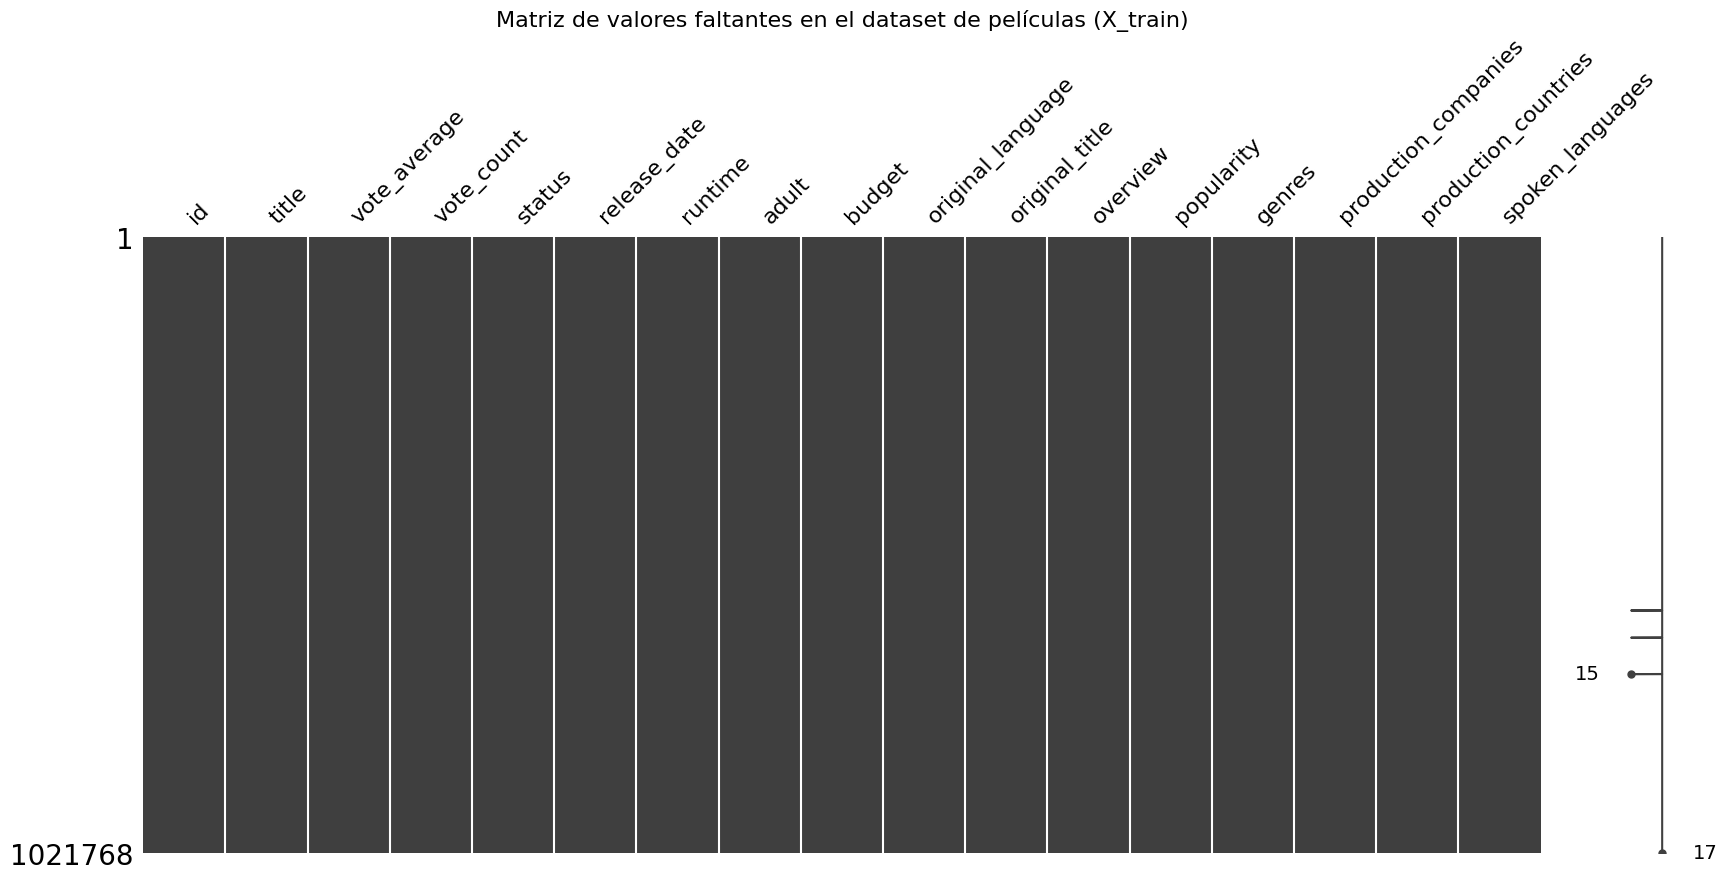

In [64]:
# Visualizar la matriz de valores faltantes en el conjunto de entrenamiento despues del tto de nulos
msno.matrix(X_train, figsize=(20,8))

plt.title("Matriz de valores faltantes en el dataset de películas (X_train)", fontsize=16)
plt.show()

## Análisis de outliers


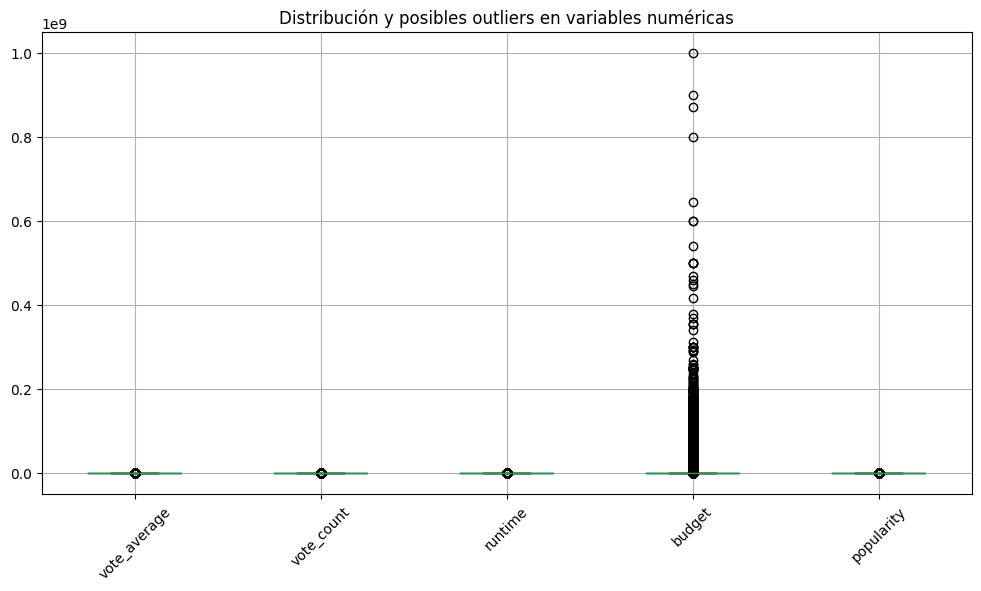

In [67]:
# Seleccionar las columnas numéricas relevantes
num_cols = ['vote_average', 'vote_count', 'runtime', 'budget', 'popularity']

# Visualizar con boxplots para ver valores extremos
plt.figure(figsize=(12, 6))
X_train[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Distribución y posibles outliers en variables numéricas")
plt.show()


In [69]:
import numpy as np

# Columnas numéricas sin incluir revenue
num_cols = ['vote_average', 'vote_count', 'runtime', 'budget', 'popularity']

# Calcular IQR
Q1 = X_train[num_cols].quantile(0.25)
Q3 = X_train[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers
outliers = ((X_train[num_cols] < (Q1 - 1.5 * IQR)) | (X_train[num_cols] > (Q3 + 1.5 * IQR))).sum()

print("Cantidad de posibles outliers por variable:\n")
print(outliers)


Cantidad de posibles outliers por variable:

vote_average     21992
vote_count      140551
runtime          19015
budget           54071
popularity      366091
dtype: int64


### Tratamiento de outliers


En esta etapa se realizará el tratamiento de valores extremos en las variables numéricas, con el objetivo de reducir la influencia de observaciones anómalas y asegurar que todas las magnitudes sean coherentes con el dominio del problema.

* vote_average: se verificará que los valores se encuentren dentro del rango permitido (0 a 10). Dado que esta variable ya está acotada por naturaleza, no requerirá transformaciones adicionales.

* vote_count, budget y popularity: presentan distribuciones fuertemente sesgadas hacia la derecha (muchas películas con valores bajos y pocas con valores extremadamente altos). Para reducir esta asimetría y mitigar el impacto de los valores extremos, se aplicará una transformación logarítmica (log1p) tanto en el conjunto de entrenamiento como en el de prueba.

* runtime: no deben existir películas con duraciones irreales (por ejemplo, menores a 30 minutos o mayores a 300 minutos). En estos casos, los valores fuera de rango se reemplazarán por la mediana de las observaciones dentro del rango válido, conservando así la coherencia de la distribución sin eliminar registros.

Al finalizar este proceso, las variables numéricas quedarán dentro de rangos plausibles, con una distribución más estable y adecuada para las etapas posteriores del modelado.

In [83]:
# Verificar rango válido para vote_average (0 a 10)
out_of_range = X_train[(X_train['vote_average'] < 0) | (X_train['vote_average'] > 10)]
print(f"Películas con vote_average fuera del rango [0, 10]: {len(out_of_range)}\n")
display(out_of_range[['id', 'title', 'vote_average']].head(10))

# Como no existen valores fuera del rango permitido, no se realizará tratamiento adicional.


# Aplicar transformación logarítmica en variables con fuerte sesgo a la derecha
log_cols = ['vote_count', 'budget', 'popularity']

for col in log_cols:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])
    print(f"Transformación logarítmica aplicada en: {col}")

# Verificar resumen estadístico después de la transformación
print("\nDistribución posterior a la transformación logarítmica:\n")
display(X_train[log_cols].describe())


# Corrección de valores anómalos
# No deben existir películas con 0 o 1 minuto ni mayores a 5 horas (300 min)
min_runtime = 30     # películas menores a esto no se consideran "largometrajes"
max_runtime = 300    # 5 horas es un límite razonable

# Detectar cuántas películas están fuera del rango
anomalos = ((X_train['runtime'] < min_runtime) | (X_train['runtime'] > max_runtime)).sum()
print(f"\nPelículas con runtime fuera de rango: {anomalos}")

# Calcular mediana válida del rango lógico
mediana_runtime = X_train.loc[
    (X_train['runtime'] >= min_runtime) & (X_train['runtime'] <= max_runtime),
    'runtime'
].median()

# Reemplazar valores anómalos por la mediana calculada
for X in (X_train, X_test):
    X.loc[(X['runtime'] < min_runtime) | (X['runtime'] > max_runtime), 'runtime'] = mediana_runtime

print(f"Mediana usada para reemplazo: {mediana_runtime}")


Películas con vote_average fuera del rango [0, 10]: 0



,id,title,vote_average


Transformación logarítmica aplicada en: vote_count
Transformación logarítmica aplicada en: budget
Transformación logarítmica aplicada en: popularity

Distribución posterior a la transformación logarítmica:



,vote_count,budget,popularity
count,1.021768e+06,1.021768e+06,1.021768e+06
mean,1.080386e-01,4.544376e-01,1.998434e-01
std,1.790267e-01,9.481817e-03,1.029562e-01
min,0.000000e+00,2.640329e-01,0.000000e+00
25%,0.000000e+00,4.549755e-01,2.219329e-01
50%,0.000000e+00,4.549755e-01,2.219329e-01
75%,3.021710e-01,4.549755e-01,2.502357e-01
max,5.901033e-01,4.886554e-01,4.521458e-01



Películas con runtime fuera de rango: 0
Mediana usada para reemplazo: 66.0
